#### Try sampling from IBP prior

Let's try sampling from the IBP prior:

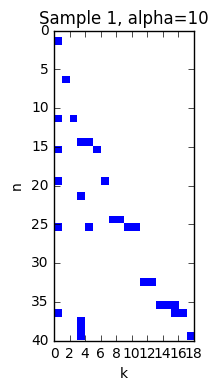

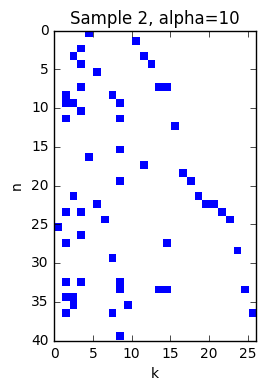

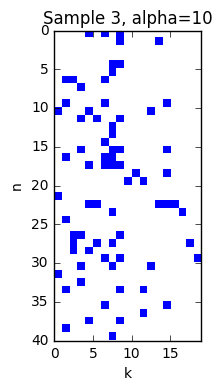

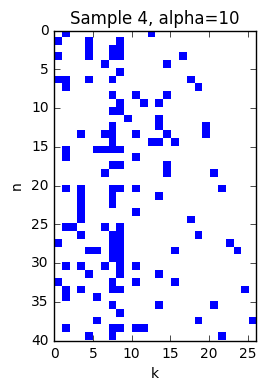

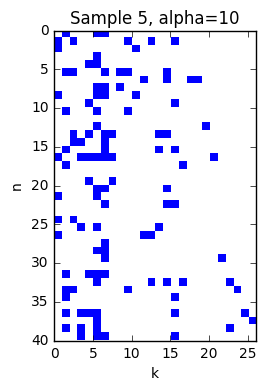

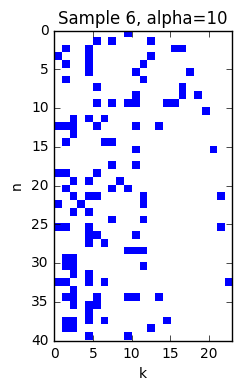

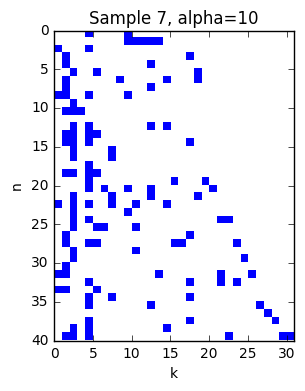

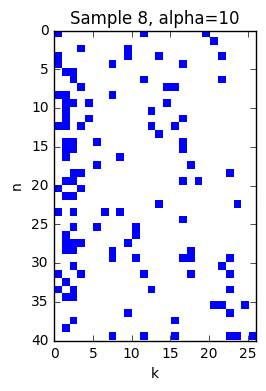

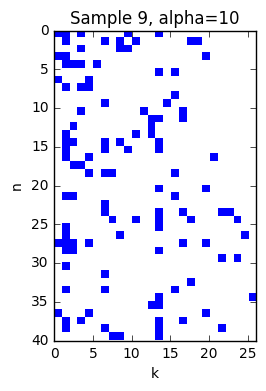

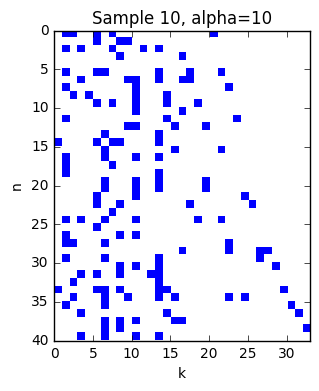

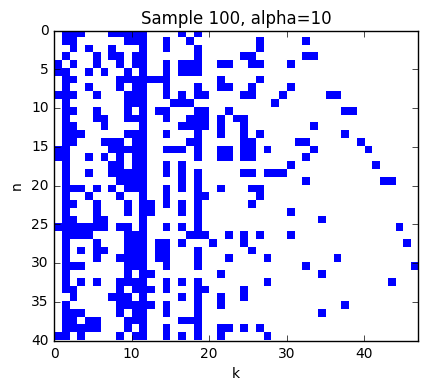

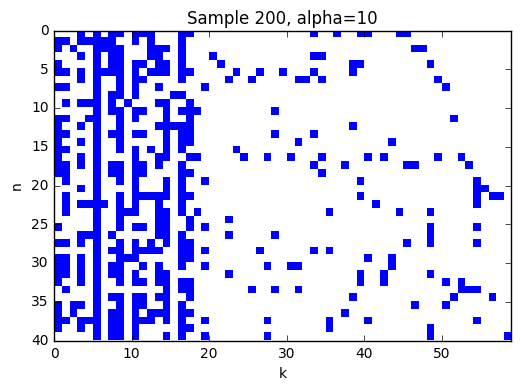

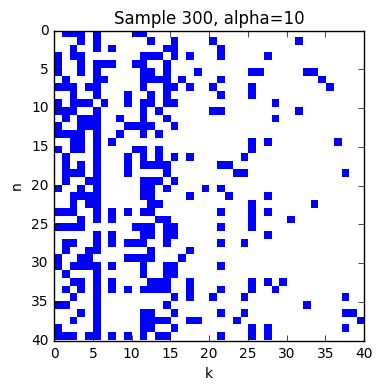

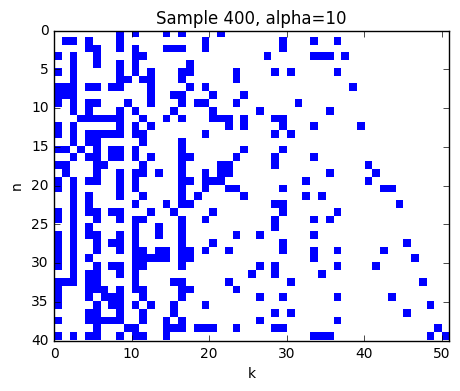

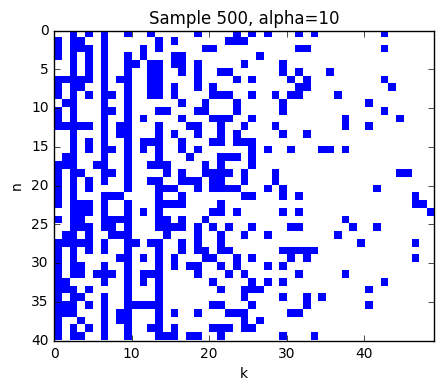

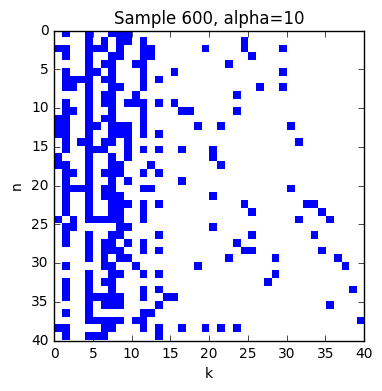

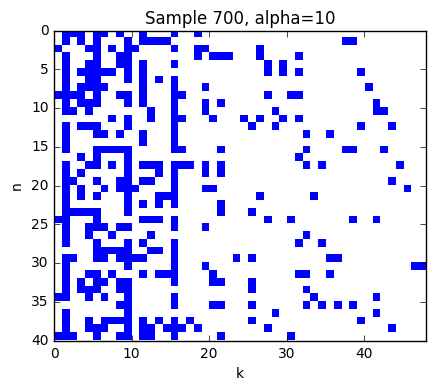

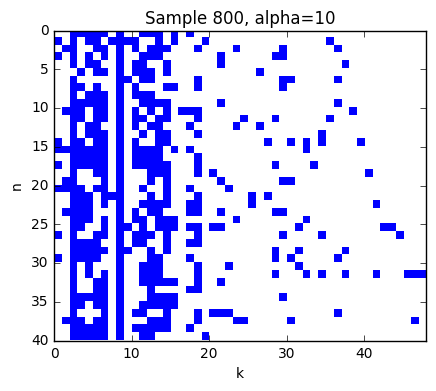

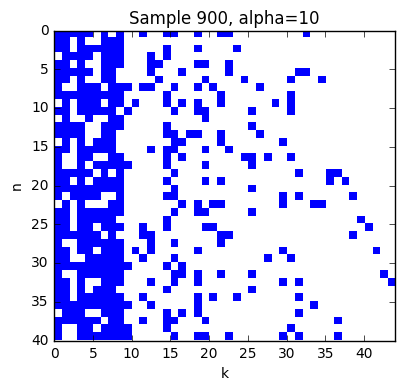

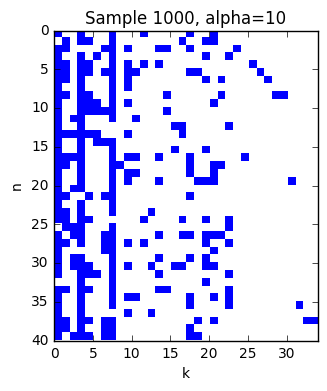

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random


def plot_sample(sample, title=''):
    N = sample.shape[0]
    K_plus = sample.shape[1]
    grid = np.zeros((N, K_plus, 3), dtype=np.float32)
    grid.fill(1.0)
    for n in range(N):
        for k in range(K_plus):
            if sample[n, k] == 1:
                grid[n][k][0:2] = 0.0

    plt.clf()
    plt.imshow(grid, interpolation='nearest', extent=[0, K_plus, N, 0])
    plt.xlabel('k')
    plt.ylabel('n')
    plt.title(title)
    plt.show()

def draw_samples(N=40, alpha=10, num_samples=1000):
    samples = []
    current_matrix = []   # use a Python list, since we'll be adding/removing columns.  the list is by column, k
                          # (I know a Python list is an array/vector, not an actual linked list, but still seems easier to work
                          #  with than eg a numpy array, in this case?)
    m = []  # list of m_k values
    random.seed(123)
    for s in range(num_samples):
        num_added = 0
        num_removed = 0
        for n in range(N):
            k = 0
            # handle existing features
            while k < len(current_matrix):
                m_minusi_k = m[k]
                old_zik = current_matrix[k][n]
                if old_zik == 1:
                    m_minusi_k -= 1
                if m_minusi_k > 0:
                    prob_zik_one = m_minusi_k / N
                    p = random.uniform(0, 1)
                    if p <= prob_zik_one:
                        new_zik = 1
                    else:
                        new_zik = 0
                    if new_zik == 1 and old_zik == 0:
                        m[k] += 1
                        current_matrix[k][n] = new_zik
                    elif new_zik == 0 and old_zik == 1:
                        m[k] -= 1
                        current_matrix[k][n] = new_zik
                else:
                    del m[k]
                    del current_matrix[k]
                    num_removed += 1
                    k -= 1
                k += 1
            # add new features
            num_new_features = np.random.poisson(alpha / N)
            for j in range(num_new_features):
                m.append(1)
                new_col = np.zeros((N,), dtype=np.float32)
                new_col[n] = 1
                current_matrix.append(new_col)
                num_added += 1
        sample = np.zeros((N, len(m)), dtype=np.int8)
        for k, column in enumerate(current_matrix):
            for n, v in enumerate(column):
                if v == 1:
                    sample[n, k] = 1
        samples.append(sample)
#         print('it', s, 'added rows', num_added, 'removed rows', num_removed)
        if (s + 1) % (num_samples // 10) == 0 or s == num_samples - 1:
            plot_sample(sample, title='Sample %s, alpha=%s' % (s + 1, alpha))
    
draw_samples(N=40, alpha=10, num_samples=10)
draw_samples(N=40, alpha=10, num_samples=1000)

draw_samples = None
plot_sample = None